In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from mpl_toolkits.mplot3d import Axes3D

In [5]:
df = pd.read_csv("../../../ML/PyTorch_CIFAR10/Histories/Tuned_KD.csv")

In [7]:
df.head(), df.describe()

(    Alpha  Temperature  Test Acc.
 0  0.0005          1.5      91.62
 1  0.0005          2.0      91.77
 2  0.0005          2.5      91.57
 3  0.0005          3.0      91.55
 4  0.0005          4.0      91.77,
            Alpha  Temperature  Test Acc.
 count  45.000000    45.000000  45.000000
 mean    0.067278     2.600000  91.891778
 std     0.074421     0.869953   0.453042
 min     0.000500     1.500000  90.010000
 25%     0.010000     2.000000  91.820000
 50%     0.050000     2.500000  92.040000
 75%     0.090000     3.000000  92.160000
 max     0.250000     4.000000  92.290000)

In [8]:
df.dropna(subset=['Test Acc.'], inplace=True)

In [9]:
df.describe()

,Alpha,Temperature,Test Acc.
count,45.000000,45.000000,45.000000
mean,0.067278,2.600000,91.891778
std,0.074421,0.869953,0.453042
min,0.000500,1.500000,90.010000
25%,0.010000,2.000000,91.820000
50%,0.050000,2.500000,92.040000
75%,0.090000,3.000000,92.160000
max,0.250000,4.000000,92.290000


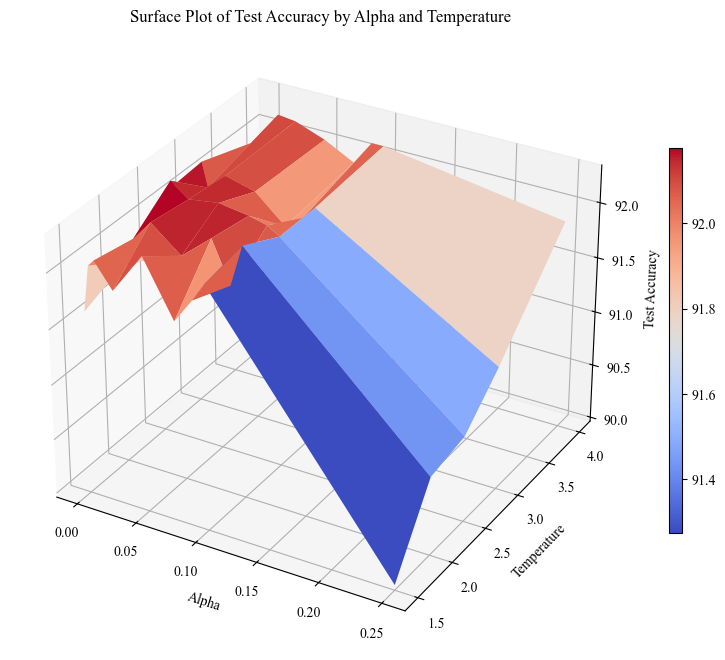

In [11]:
# Create a pivot table for the X, Y, Z coordinates
pivot_table = df.pivot(index='Temperature', columns='Alpha', values='Test Acc.')

# Create a meshgrid for X and Y
X, Y = np.meshgrid(pivot_table.columns, pivot_table.index)

# Z values are the Test Accuracies
Z = pivot_table.values

# Plotting
fig = plt.figure(figsize=(10,10))
plt.rcParams['font.family'] = 'Times New Roman'
ax = fig.add_subplot(111, projection='3d')

# Create a surface plot
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm', edgecolor='none')

# Add labels and title
ax.set_ylabel('Temperature')
ax.set_xlabel('Alpha')
ax.set_zlabel('Test Accuracy')
ax.set_title('Surface Plot of Test Accuracy by Alpha and Temperature')

# Add a color bar which maps values to colors
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=30)

plt.show()